In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
popularity_details = pd.read_csv('epsilon_work_1.csv')

In [3]:
popularity_details.head()

,Anime ID,Title,Members,Favorites,Airing_Start,Airing_End,Episodes,Duration,Broadcast_Day,Watch Hours,Countries Available,Awards Won,Dub Availability,User_Reviews,Score
0,416,Ability enter,"9,11,462",34151,16-08-2017,Still Airing,415,38.660095,Saturday,"14,62,34,946",27,7,Yes,6499,5.272
1,447,Although,"8,63,683",11442,17-06-2036,08-09-2017,53,57.930918,Monday,"10,23,76,569",18,6,Yes,10802,3.190
2,471,Dog office into,"6,72,557",25941,14-10-2016,07-07-2017,38,42.000000,Thursday,"5,91,11,950",9,8,Yes,6757,9.790
3,556,Fall kitchen through,"6,60,084",29412,26-11-2020,Still Airing,222,49.000000,Saturday,"5,72,36,652",6,7,Partial,7514,9.430
4,723,Decision service,"7,70,710",48962,01-05-2018,15-01-2019,37,50.000000,Sunday,"2,17,48,928",9,4,Yes,11770,9.480


In [53]:
popularity_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5374 entries, 0 to 5373
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Anime ID             5374 non-null   int64  
 1   Title                5374 non-null   object 
 2   Members              5374 non-null   object 
 3   Favorites            5374 non-null   int64  
 4   Airing_Start         5374 non-null   object 
 5   Airing_End           5374 non-null   object 
 6   Episodes             5374 non-null   int64  
 7   Duration             5374 non-null   float64
 8   Broadcast_Day        5374 non-null   object 
 9   Watch Hours          5374 non-null   float64
 10  Countries Available  5374 non-null   int64  
 11  Awards Won           5374 non-null   int64  
 12  Dub Availability     5374 non-null   object 
 13  User_Reviews         5374 non-null   int64  
 14  Score                5374 non-null   float64
dtypes: float64(3), int64(6), object(6)
mem

In [5]:
# check for duplicates
popularity_details.duplicated().sum()

np.int64(0)

In [52]:
# convert the datetypes to proper format

popularity_details['Watch Hours'] = popularity_details['Watch Hours'].astype(str).str.replace('$', '').str.replace(',', '').astype(float) 


In [18]:
# summary statistics
popularity_details.describe()

,Anime ID,Favorites,Episodes,Duration,Watch Hours,Countries Available,Awards Won,User_Reviews,Score
count,5374.000000,5374.000000,5374.000000,5374.000000,5.374000e+03,5374.000000,5374.000000,5374.000000,5374.000000
mean,170221.451619,28482.050242,87.226275,50.896752,8.521809e+07,15.556197,6.401377,9759.413100,8.501041
std,77809.761131,14094.833217,108.698485,48.267150,4.167506e+07,8.717120,1.313450,2832.817537,1.660664
min,416.000000,18.000000,1.000000,9.346950,3.010313e+06,1.000000,4.000000,4757.000000,1.940000
25%,107374.000000,17287.000000,28.000000,37.000000,5.084701e+07,8.000000,5.000000,7317.250000,8.230000
50%,172595.000000,30135.000000,54.000000,45.000000,9.016705e+07,16.000000,7.000000,9736.000000,8.980000
75%,237074.250000,40872.500000,86.000000,54.000000,1.210519e+08,23.000000,8.000000,12241.000000,9.550000
max,299978.000000,49995.000000,522.000000,1146.090629,1.499881e+08,30.000000,9.000000,14964.000000,10.000000


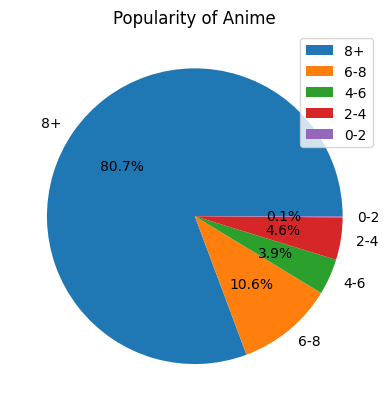

In [ ]:
# Filtering the popularity
popularity={'8+':0,'6-8':0,'4-6':0,'2-4':0,'0-2':0}
for i in popularity_details['Score']:
    if i>=8:
        popularity['8+']+=1
    elif i>=6:
        popularity['6-8']+=1
    elif i>=4:
        popularity['4-6']+=1
    elif i>=2:
        popularity['2-4']+=1
    else:
        popularity['0-2']+=1
popularity=pd.DataFrame(popularity.items(),columns=['Popularity','Count'])
popularity.plot.pie(y='Count',labels=popularity['Popularity'],autopct='%1.1f%%')
plt.ylabel('')
plt.title('Popularity of Anime')
plt.show()

Text(0.5, 1.0, 'Score Distribution')

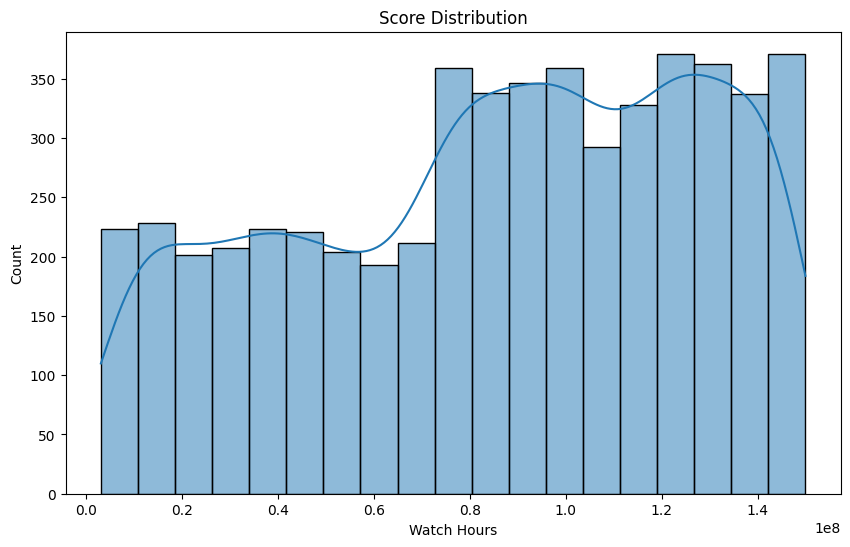

In [24]:
# watch hours distribution
plt.figure(figsize=(10,6))
sns.histplot(popularity_details['Watch Hours'],kde=True)
plt.title('Score Distribution')

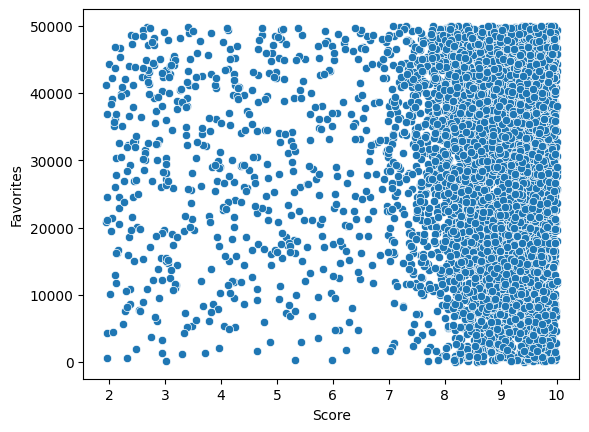

In [31]:
# relation between faviorates and Watch hours
sns.scatterplot(popularity_details,x='Score',y='Favorites')
plt.show()

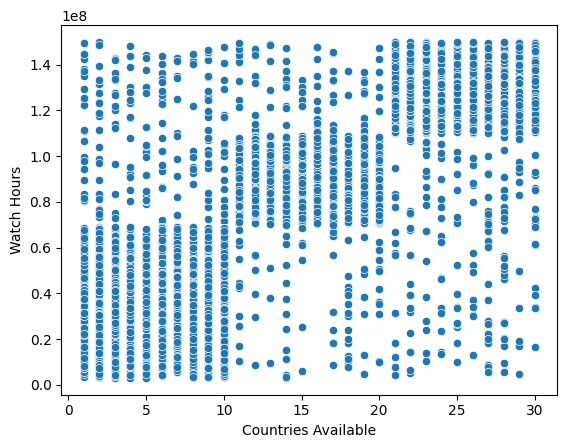

In [ ]:
# relation between faviorates and Watch hours
sns.scatterplot(popularity_details,x='Countries Available',y='Watch Hours',)
plt.show()

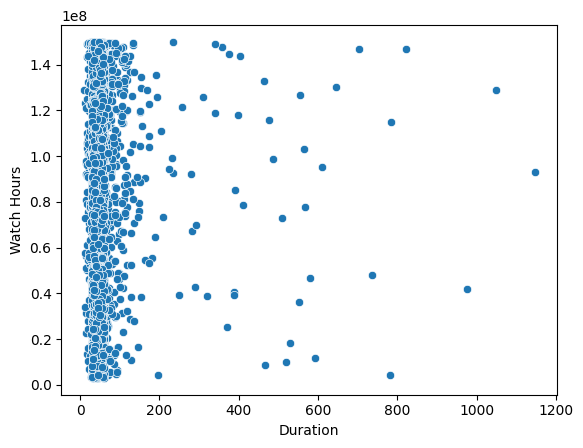

In [39]:
# relation between faviorates and Watch hours
sns.scatterplot(popularity_details,x='Duration',y='Watch Hours',)
plt.show()

<Axes: xlabel='Dub Availability', ylabel='Watch Hours'>

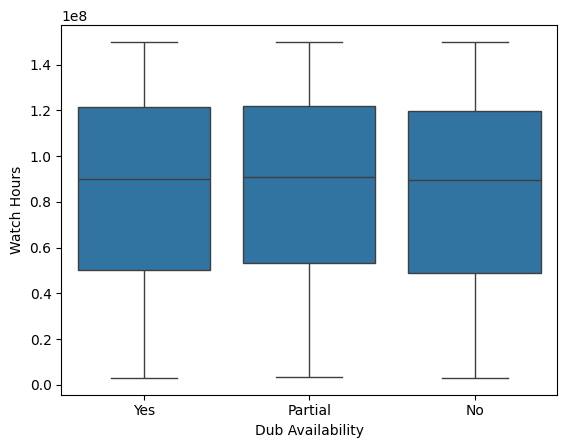

In [47]:
# realtion between dub availability and watch hours
sns.boxplot(popularity_details,x='Dub Availability',y='Watch Hours')

<Axes: >

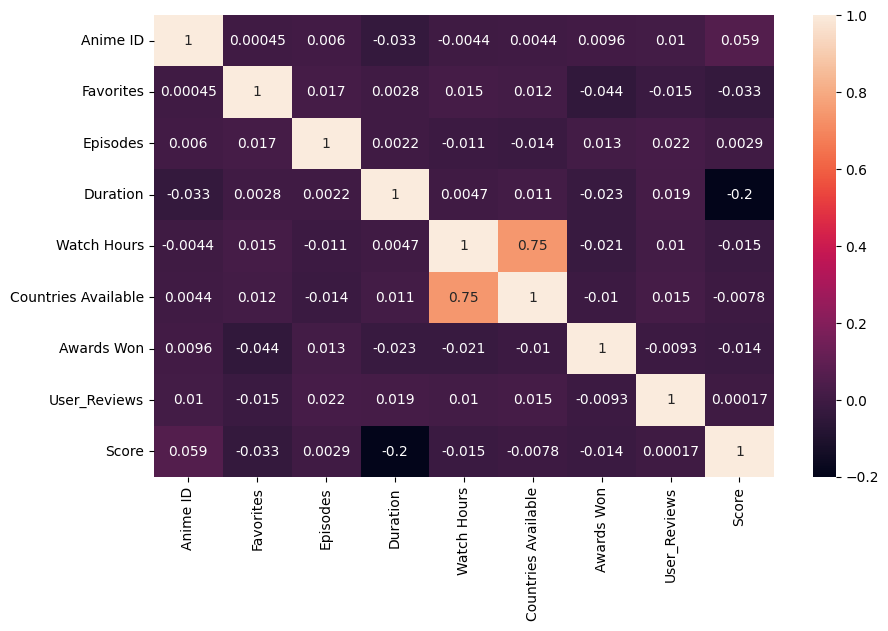

In [69]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(popularity_details.select_dtypes(include=['float64', 'int64']).corr(), annot=True)